<a href="https://colab.research.google.com/github/varshaelza/Text-Summarization-Categorization/blob/main/BBC_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcequtrain.csv')

In [2]:
train

Unnamed: 0                               news_wo_punct&single      Type
0              0   . trouble hit mitsubishi motor talk french ca...  business
1              1   . industrial production increased december ac...  business
2              2   . profit chinese computer firm lenovo stood s...  business
3              3   . us german carmaker daimlerchrysler sold car...  business
4              4   . libya withdrawn bn asset us asset previousl...  business
...          ...                                                ...       ...
1490        1490   . explosion consumer technology continue dele...      tech
1491        1491   . computer help solve world difficult health ...      tech
1492        1492   . next generation dvd technology backed sony ...      tech
1493        1493   . first conviction piracy peer to peer networ...      tech
1494        1494   . hi tech industry starting get environmental...      tech

[1495 rows x 3 columns]

In [4]:
from sklearn import model_selection
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(train['news_wo_punct&single'],train['Type'],test_size=0.25)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['news_wo_punct&single'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [6]:
print('TF-IDF output shape:', Train_X_Tfidf.shape)

TF-IDF output shape: (1121, 5000)


LSA

In [7]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [8]:
print("total no of doc of train: ", len(train['news_wo_punct&single']))

total no of doc of train:  1495


In [9]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADV']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [10]:
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    result.append(token)
  return result

In [11]:
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
processed_docs = train['news_wo_punct&single'].map(preprocess)
processed_docs = processed_docs.values.tolist()
processed_docs = lemmatization(processed_docs)

In [12]:
processed_docs

[['trouble',
  'hit',
  'major',
  'japanese',
  'car',
  'firm',
  'red',
  'confirm',
  'early',
  'report',
  'negotiation',
  'spokesman',
  'refuse',
  'comment',
  'speculation',
  'could',
  'end',
  'build',
  'car',
  'psa',
  'perhaps',
  'japanese',
  'rival',
  'hit',
  'scandal',
  'withdrawal',
  'support',
  'shareholder',
  'daimlerchrysler',
  'german',
  'firm',
  'majority',
  'shareholder',
  'decide',
  'last',
  'stop',
  'provide',
  'financial',
  'backing',
  'sale',
  'slide',
  'year',
  'catalyse',
  'revelation',
  'company',
  'systematically',
  'hide',
  'record',
  'fault',
  'secretly',
  'repair',
  'vehicle',
  'unveil',
  'recovery',
  'plan',
  'later',
  'analyst',
  'say',
  'would',
  'necessary',
  'part',
  'come',
  'least',
  'slow',
  'sale',
  'leave',
  'manufacturing',
  'capacity',
  'use'],
 ['industrial',
  'production',
  'increase',
  'accord',
  'late',
  'index',
  'national',
  'manufacturing',
  'activity',
  'rise',
  'last',
 

In [13]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 analyst
1 backing
2 build
3 capacity
4 car
5 catalyse
6 come
7 comment
8 company
9 confirm
10 could


In [14]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
dictionary

In [15]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]


[(16, 1),
 (20, 1),
 (32, 1),
 (43, 1),
 (50, 1),
 (103, 1),
 (113, 1),
 (126, 1),
 (144, 1),
 (187, 4),
 (195, 2),
 (208, 2),
 (218, 1),
 (225, 1),
 (236, 2),
 (269, 1),
 (276, 1),
 (280, 2),
 (333, 2),
 (352, 1),
 (378, 1),
 (388, 2),
 (389, 1),
 (411, 1),
 (418, 1),
 (437, 2),
 (447, 1),
 (464, 2),
 (479, 2),
 (498, 1),
 (516, 1),
 (517, 1),
 (518, 1),
 (519, 1),
 (520, 1),
 (521, 2),
 (522, 1),
 (523, 1),
 (524, 2),
 (525, 1),
 (526, 1),
 (527, 3),
 (528, 1),
 (529, 1),
 (530, 1),
 (531, 4),
 (532, 1),
 (533, 1),
 (534, 1),
 (535, 1),
 (536, 1),
 (537, 1),
 (538, 1),
 (539, 1),
 (540, 1),
 (541, 1),
 (542, 1),
 (543, 1),
 (544, 1)]

In [16]:
bow_doc_10 = bow_corpus[10]
for i in range(len(bow_doc_10)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10[i][0], 
                                               dictionary[bow_doc_10[i][0]], 
bow_doc_10[i][1]))

Word 16 ("hit") appears 1 time.
Word 20 ("least") appears 1 time.
Word 32 ("recovery") appears 1 time.
Word 43 ("spokesman") appears 1 time.
Word 50 ("accord") appears 1 time.
Word 103 ("well") appears 1 time.
Word 113 ("deal") appears 1 time.
Word 126 ("hard") appears 1 time.
Word 144 ("quarter") appears 1 time.
Word 187 ("bank") appears 4 time.
Word 195 ("give") appears 2 time.
Word 208 ("tell") appears 2 time.
Word 218 ("bn") appears 1 time.
Word 225 ("follow") appears 1 time.
Word 236 ("own") appears 2 time.
Word 269 ("face") appears 1 time.
Word 276 ("much") appears 1 time.
Word 280 ("private") appears 2 time.
Word 333 ("time") appears 2 time.
Word 352 ("borrow") appears 1 time.
Word 378 ("destroy") appears 1 time.
Word 388 ("estimate") appears 2 time.
Word 389 ("even") appears 1 time.
Word 411 ("huge") appears 1 time.
Word 418 ("interest") appears 1 time.
Word 437 ("people") appears 2 time.
Word 447 ("public") appears 1 time.
Word 464 ("sector") appears 2 time.
Word 479 ("state")

In [17]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.09721364268855144),
 (1, 0.10221654570732003),
 (2, 0.1657728072861103),
 (3, 0.2794460203781196),
 (4, 0.043159233302500925),
 (5, 0.11160463046834612),
 (6, 0.06687884701852585),
 (7, 0.12365042169416107),
 (8, 0.0404971167622686),
 (9, 0.10190548827303907),
 (10, 0.07319948113252235),
 (11, 0.06955726389794238),
 (12, 0.11278729223404167),
 (13, 0.13513518624164378),
 (14, 0.1517778427865802),
 (15, 0.1605821781048386),
 (16, 0.16048746519729437),
 (17, 0.31190772101264896),
 (18, 0.03962124570297284),
 (19, 0.09611691057981522),
 (20, 0.10824104750061295),
 (21, 0.08668143062469551),
 (22, 0.10190548827303907),
 (23, 0.15079457629435114),
 (24, 0.19406095840118426),
 (25, 0.1671752348512663),
 (26, 0.1605821781048386),
 (27, 0.07043915511471072),
 (28, 0.1570648374807022),
 (29, 0.06812668877751354),
 (30, 0.09248574365112111),
 (31, 0.0785949979328834),
 (32, 0.1517778427865802),
 (33, 0.1517778427865802),
 (34, 0.13345274900270873),
 (35, 0.07335818338768528),
 (36, 0.1347

In [18]:
def compute_coherence_values(dictionary, corpus_tfidf, processed_docs, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(corpus_tfidf, num_topics=10, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [19]:
def plot_graph(processed_docs,start, stop, step):
    #dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, corpus_tfidf, processed_docs, stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

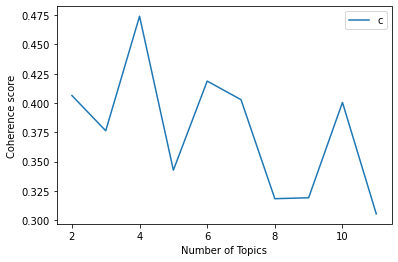

In [20]:
start,stop,step=2,12,1
plot_graph(processed_docs,start,stop,step)

In [21]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
x_train_svd = svd.fit_transform(Train_X_Tfidf)
x_test_svd = svd.transform(Test_X_Tfidf)

print('LSA output shape:', x_train_svd.shape)

LSA output shape: (1121, 20)


In [22]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [23]:
from sklearn import  naive_bayes, svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y, average='micro')*100)
print("SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(predictions_SVM, Test_Y, average='weighted')*100)


SVM Accuracy Score ->  97.59358288770053
SVM Precision Score ->  97.59358288770053
SVM Recall Score ->  97.59358288770053
SVM f1 Score ->  97.60304043148118


In [24]:
from sklearn import  naive_bayes, svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train_svd,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(x_test_svd)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("SVM Precision Score -> ",precision_score(predictions_SVM, Test_Y, average='micro')*100)
print("SVM Recall Score -> ",recall_score(predictions_SVM, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(Test_Y, predictions_SVM, average='weighted')*100)



SVM Accuracy Score ->  96.2566844919786
SVM Precision Score ->  96.2566844919786
SVM Recall Score ->  96.2566844919786
SVM f1 Score ->  96.25062824809928


In [25]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Naive Bayes Precision Score -> ",precision_score(predictions_NB, Test_Y, average='micro')*100)
print("Naive Bayes Recall Score -> ",recall_score(predictions_NB, Test_Y, average='micro')*100)
print("Naive Bayes f1 Score -> ",f1_score(Test_Y, predictions_NB, average='weighted')*100)


Naive Bayes Accuracy Score ->  97.59358288770053
Naive Bayes Precision Score ->  97.59358288770053
Naive Bayes Recall Score ->  97.59358288770053
Naive Bayes f1 Score ->  97.59080360964755


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
print('coherence value: ',coherence_value)

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=50, step=1)

In [ ]:
model_list[0]

In [ ]:
#Naive Bayes using LSA data

Naive = naive_bayes.MultinomialNB(alpha=0.01)
Naive.fit(x_train_svd,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(x_test_svd)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [ ]:
import pandas as pd
testdata = pd.read_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')

In [ ]:
testdata

Unnamed: 0  ...      Type
0          1288  ...  politics
1          1170  ...  politics
2          1388  ...     sport
3          1109  ...  politics
4          1851  ...      tech
..          ...  ...       ...
440        1117  ...  politics
441        1234  ...  politics
442        1720  ...     sport
443        1230  ...  politics
444         491  ...  business

[445 rows x 5 columns]

In [ ]:
testdata.drop(testdata.columns[testdata.columns.str.contains('unnamed',case= False)],axis=1,inplace=True)
testdata

News  ...      Type
0    Labour battle plan 'hides Blair'\n \n The Tori...  ...  politics
1    Tutu's Guantanamo release call\n \n Archbishop...  ...  politics
2    Holmes starts 2005 with GB events\n \n Kelly H...  ...     sport
3    Tory expert denies defeatism\n \n The Conserva...  ...  politics
4    Movie body targets children's PCs\n \n The bod...  ...      tech
..                                                 ...  ...       ...
440  NHS waiting time target is cut\n \n Hospital w...  ...  politics
441  Baron Kinnock makes Lords debut\n \n Former La...  ...  politics
442  Player burn-out worries Robinson\n \n England ...  ...     sport
443  Blunkett hints at election call\n \n Ex-Home S...  ...  politics
444  Fed chief warning on US deficit\n \n Federal R...  ...  business

[445 rows x 4 columns]

In [ ]:
testdata["News_lower"] = testdata["News"].str.lower()
testdata.head()

News  ...                                         News_lower
0  Labour battle plan 'hides Blair'\n \n The Tori...  ...  labour battle plan 'hides blair'\n \n the tori...
1  Tutu's Guantanamo release call\n \n Archbishop...  ...  tutu's guantanamo release call\n \n archbishop...
2  Holmes starts 2005 with GB events\n \n Kelly H...  ...  holmes starts 2005 with gb events\n \n kelly h...
3  Tory expert denies defeatism\n \n The Conserva...  ...  tory expert denies defeatism\n \n the conserva...
4  Movie body targets children's PCs\n \n The bod...  ...  movie body targets children's pcs\n \n the bod...

[5 rows x 5 columns]

In [ ]:
testdata['news_wo_nltab'] = testdata['News_lower'].replace('\n','.', regex=True)
testdata['news_wo_nltab'] = testdata['news_wo_nltab'].replace('\t',' ', regex=True)
testdata['news_wo_nltab'] = testdata['news_wo_nltab'].replace(r'\.+', ".", regex=True)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#print(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
testdata["news_wo_stop"] = testdata["news_wo_nltab"].apply(lambda text: remove_stopwords(text))
#traindata.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
testdata['news_wo_no'] = testdata['news_wo_stop'].str.replace('(\d*\.\d+)|(\d+\.[0-9 ]+)|(\d)', '')

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

testdata["news_lemmatize(wordnet)"] = testdata["news_wo_no"].apply(lambda text: lemmatize_words(text))
#traindata.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import string
PUNCT_TO_REMOVE =  '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    no_punct = ""
    for char in text:
      if char not in PUNCT_TO_REMOVE:
        no_punct = no_punct + char
      else:
        no_punct = no_punct + ' '
    return(no_punct)
testdata["news_wo_punct"] = testdata["news_lemmatize(wordnet)"].apply(lambda text: remove_punctuation(text))
#traindata.head()

In [ ]:
testdata['news_wo_punct'] = testdata['news_wo_punct'].replace(r'\.+', ".", regex=True)

In [ ]:
STOPWORDS = ['a' ,'b', 'c','d','e','f' ,'g' ,'h','i','j','k','l','m','n','o' ,'p' ,'q','r','s','t','u' ,'v' ,'w','x','y','z']
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
testdata["news_wo_punct&single"] = testdata["news_wo_punct"].apply(lambda text: remove_stopwords(text))


In [ ]:
def spl(text):
  return text.split('.',1)[1]
testdata["news_wo_punct&single"]=testdata["news_wo_punct&single"].apply(lambda text: spl(text))
testdata.head()

News  ...                               news_wo_punct&single
0  Labour battle plan 'hides Blair'\n \n The Tori...  ...   . tory accused tony blair terrified scrutiny ...
1  Tutu's Guantanamo release call\n \n Archbishop...  ...   . archbishop desmond tutu called release rema...
2  Holmes starts 2005 with GB events\n \n Kelly H...  ...   . kelly holmes start series race britain. . h...
3  Tory expert denies defeatism\n \n The Conserva...  ...   . conservatives campaign director denied repo...
4  Movie body targets children's PCs\n \n The bod...  ...   . body represents movie industry released lat...

[5 rows x 11 columns]

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(train['news_wo_punct&single'])

Test_X_Tfidf = Tfidf_vect.transform(testdata['news_wo_punct&single'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

Test_Y = Encoder.fit_transform(testdata['Category_id'])

In [ ]:
from sklearn import  naive_bayes, svm
from sklearn.metrics import accuracy_score
#SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
#SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)


SVM Accuracy Score ->  98.20224719101124


In [ ]:
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  96.40449438202248


In [ ]:
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["sentiment"], y_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

In [ ]:
temp_lsa = svdT.transform(Train_X_Tfidf)
    

In [ ]:
testdata.to_csv('/content/drive/MyDrive/BBC Dataset/bbcsummtest.csv')

In [ ]:
from sklearn.decomposition import TruncatedSVD
tfidf_vec = TfidfVectorizer(use_idf = True, norm='12')
lsa = TruncatedSVD(n_components = 20, n_iter=100)
print('array',lsa.fit(Train_X_Tfidf.toarray()))
lsa.components_

print('TF-IDF output shape:', Train_X_Tfidf.shape)

array TruncatedSVD(algorithm='randomized', n_components=20, n_iter=100,
             random_state=None, tol=0.0)
TF-IDF output shape: (1335, 5000)
